In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import time


mockdata = np.load("../data/dataset_all_H1_bootstrap_O3a.npy")



In [2]:
mask = np.where(mockdata[:,6] > 0)
mockdata[:,6][mask] = 1

(array([ 5400.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32400.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

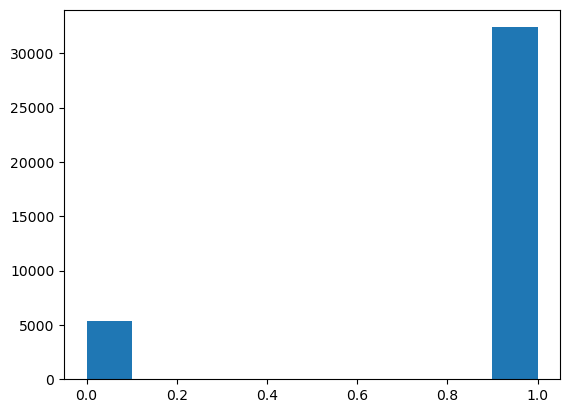

In [3]:
plt.hist(mockdata[:,6])

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BulgeStack(nn.Module):
    def __init__(self, pp_in, pp_out):
        super(BulgeStack, self).__init__()
        self.l1 = nn.Linear(pp_in, 10)
        self.l2 = nn.Linear(10, 20)
        self.l3 = nn.Linear(20, 10)
        self.l4 = nn.Linear(10, pp_out)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return x


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = BulgeStack(6, 6)
        self.fc2 = BulgeStack(6,6)
        self.fc3 = BulgeStack(6,6)
        self.fc4 = BulgeStack(6,2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(6, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 2),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [6]:
def train_model(device, trainingdata: torch.Tensor, trainingresult: torch.Tensor, epochs=10):
    model = NeuralNetwork().to(device)
    criterion = nn.CrossEntropyLoss()  # Multiclass classification loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Move data to device
    x = trainingdata.float().to(device)
    y = trainingresult.long().to(device)  # Targets must be of type LongTensor

    # Debugging: Check input/output shapes
    print("Training data shape:", x.shape)
    print("Target shape:", y.shape)

    start_time = time.time()
    npoint = np.shape(trainingdata)[0]
    losslist = []
    acclist = []
    # Training loop
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x)  # Forward pass (logits)
        # print("Model output shape:", outputs.shape)  # Debugging
        # Inside your training loop
        outputs = model(x)  # Forward pass (logits)
        loss = criterion(outputs, y)  # Compute loss

        # Compute predicted classes
        _, predicted = torch.max(outputs, 1)  # Get indices of the max logits along dim=1
        correct = (predicted == y).sum().item()  # Compare predictions with ground truth and count correct ones

        # Calculate accuracy
        accuracy = correct / npoint
        losslist.append(loss)
        acclist.append(accuracy)
        # Print epoch results
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}, Accuracy: {accuracy * 100:.2f}%")

        loss.backward()
        optimizer.step()

    elapsed_time = time.time() - start_time
    print(f"Training completed on {device} in {elapsed_time:.2f} seconds")
    return model, losslist, acclist


In [7]:
# Prepare features and labels
features = mockdata[:, :6]  # First 6 columns for features
labels = mockdata[:, 6]     # 7th column for class labels (multiclass)

# Ensure labels are integers (already assumed to be 0 to 6)
labels = labels.astype(np.int64)  # Convert to int64 for PyTorch compatibility

print("Unique target classes:", np.unique(labels))


Unique target classes: [0 1]


In [8]:
print("\nTraining")

device = torch.device("cuda")
nepochs = 1000
model, loss, accuracy = train_model(
    device,
    torch.from_numpy(features),
    torch.from_numpy(labels),
    epochs = nepochs
)

epochs = np.arange(1, nepochs + 1, 1)



Training
Training data shape: torch.Size([37800, 6])
Target shape: torch.Size([37800])
Epoch 1/1000, Loss: 0.5568873286247253, Accuracy: 85.71%
Epoch 2/1000, Loss: 0.5032143592834473, Accuracy: 85.71%
Epoch 3/1000, Loss: 0.4825587570667267, Accuracy: 85.71%
Epoch 4/1000, Loss: 0.4768029749393463, Accuracy: 85.71%
Epoch 5/1000, Loss: 0.4750489890575409, Accuracy: 85.71%
Epoch 6/1000, Loss: 0.4738626778125763, Accuracy: 85.71%
Epoch 7/1000, Loss: 0.47277596592903137, Accuracy: 85.71%
Epoch 8/1000, Loss: 0.4717361629009247, Accuracy: 85.71%
Epoch 9/1000, Loss: 0.4707403779029846, Accuracy: 85.71%
Epoch 10/1000, Loss: 0.46979668736457825, Accuracy: 85.71%
Epoch 11/1000, Loss: 0.46888428926467896, Accuracy: 85.71%
Epoch 12/1000, Loss: 0.46801772713661194, Accuracy: 85.71%
Epoch 13/1000, Loss: 0.46721115708351135, Accuracy: 85.71%
Epoch 14/1000, Loss: 0.4664402902126312, Accuracy: 85.71%
Epoch 15/1000, Loss: 0.46571192145347595, Accuracy: 85.71%
Epoch 16/1000, Loss: 0.4650055766105652, Accu

In [20]:
lossconv  = np.array([t.cpu().item() for t in loss])
# accconv  = np.array([t for t in accuracy])
accconv = np.array(accuracy)

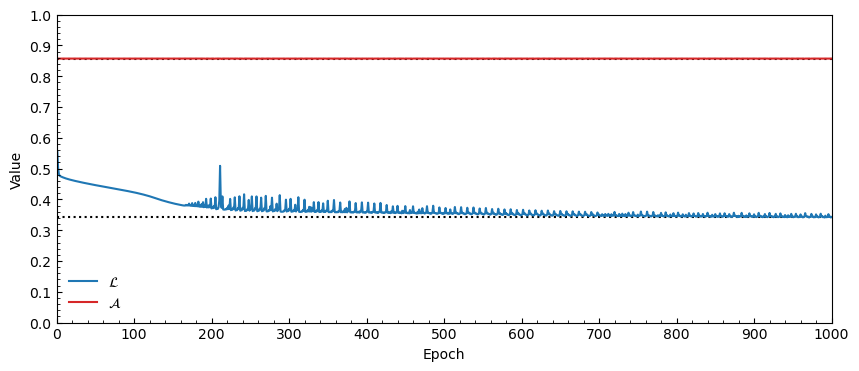

In [48]:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)





fig, ax = plt.subplots(1, 1, squeeze=  False, figsize = (10, 4))
ax[0,0].plot(epochs, lossconv, label = r"$\mathcal{L}$", zorder= 1, color = "tab:blue")
ax[0,0].plot(epochs, accconv, label = r"$\mathcal{A}$",zorder = 1, color = "tab:red")
ax[0,0].axhline(lossconv.min(),zorder= 0,color = "k", linestyle = "dotted")
ax[0,0].axhline(accconv.max(),zorder= 0,color = "k", linestyle = "dotted")

ax[0,0].tick_params(axis="y",direction="in",which="both")
ax[0,0].tick_params(axis="x",direction="in",which="both")
ax[0,0].set_yticks(np.arange(0, 1.1, 0.1))
ax[0,0].set_xticks(np.arange(0, nepochs + 1, nepochs // 10))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(nepochs//50))
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].set_xlabel("Epoch")
ax[0,0].set_ylabel("Value")
ax[0,0].set_xlim(0, nepochs)
ax[0,0].set_ylim(0, 1)
ax[0,0].legend(frameon=False)
# ax[0,0].grid(True,which="minor")

In [ ]:
def plot_probability_distribution(model, feature_data, feature_3_idx=2, feature_4_idx=3, resolution=100, device='cuda'):
    """
    Plots the probability distribution in the plane of the third and fourth feature.

    Parameters:
        model: Trained PyTorch model.
        feature_data: Original feature data (to determine the range of features).
        feature_3_idx: Index of the third feature (default: 2).
        feature_4_idx: Index of the fourth feature (default: 3).
        resolution: Number of points along each axis in the grid (default: 100).
        device: Device to run the computation on ('cuda' or 'cpu').
    """
    # Transfer the model to the specified device
    model = model.to(device)

    # Determine the ranges for the third and fourth features
    feature_3_range = np.linspace(feature_data[:, feature_3_idx].min(), feature_data[:, feature_3_idx].max(), resolution)
    feature_4_range = np.linspace(feature_data[:, feature_4_idx].min(), feature_data[:, feature_4_idx].max(), resolution)

    # Create a mesh grid
    grid_x, grid_y = np.meshgrid(feature_3_range, feature_4_range)

    # Prepare input data for the model
    grid_points = np.c_[grid_x.ravel(), grid_y.ravel()]  # Flatten grid
    num_features = feature_data.shape[1]
    
    # Fix other features to their mean values
    fixed_features = np.mean(feature_data, axis=0)
    input_data = np.tile(fixed_features, (grid_points.shape[0], 1))
    input_data[:, feature_3_idx] = grid_points[:, 0]
    input_data[:, feature_4_idx] = grid_points[:, 1]

    # Convert to PyTorch tensor and transfer to device
    input_tensor = torch.from_numpy(input_data).float().to(device)

    # Use the model to compute probabilities
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        logits = model(input_tensor)
        probabilities = torch.softmax(logits, dim=1).cpu().numpy()  # Convert to probabilities and move to CPU for plotting

    # Reshape probabilities for plotting
    prob_class = [probabilities[:, 0].reshape(resolution, resolution),  # Example: probabilities for class 0
                probabilities[:, 1].reshape(resolution, resolution)] # Example: probabilities for class 0
                # probabilities[:, 2].reshape(resolution, resolution),  # Example: probabilities for class 0
                # probabilities[:, 3].reshape(resolution, resolution),  # Example: probabilities for class 0
                # probabilities[:, 4].reshape(resolution, resolution),  # Example: probabilities for class 0
                # probabilities[:, 5].reshape(resolution, resolution),  # Example: probabilities for class 0
                # probabilities[:, 6].reshape(resolution, resolution)]  # Example: probabilities for class 0
    # Plot the probability distribution
    # fig, ax = plt.subplots(3, 3, figsize=(8, 6),squeeze = False)
    # ax[0,0].contourf(grid_x, grid_y, prob_class_0, levels=50, cmap='viridis')
    # # plt.colorbar(label="Probability of Class 6")
    # plt.xlabel(f"Feature m1")
    # plt.ylabel(f"Feature m2")
    # plt.title("Probability Distribution for Class 6")
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.xlim([20, 800])
    # plt.ylim([2, 300])
    # plt.show()

    nx = 2
    ny = 1
    fig,ax =plt.subplots(ny, nx,squeeze=False, figsize = (10, 5), sharex=True, sharey=True)

    slices = np.array([[0, 1]])

    for ix in range(nx):
        for iy in range(ny):
            if slices[iy,ix] >= 0:
                mask = mockdata[:,6] == slices[iy,ix]
                
                
                ax[iy,ix].contourf(grid_x, grid_y, prob_class[slices[iy,ix]], levels=50, cmap='viridis')
                ax[iy,ix].scatter(mockdata[:,2][mask], mockdata[:,3][mask], s = 0.1, alpha = 0.5, color = 'tab:red')
                if (iy == ny-1):
                    ax[iy,ix].set_xlabel(r"$m_{1}$")
                if (ix == 0):
                    ax[iy,ix].set_ylabel(r"$m_{2}$")
                ax[iy,ix].loglog()
            ax[iy,ix].set_xlim([20, 800])
            ax[iy,ix].set_ylim([2, 300])
            ax[iy,ix].tick_params(axis="y",direction="in",which="both")
            ax[iy,ix].tick_params(axis="x",direction="in",which="both")
            ax[iy,ix].text(0.1,0.9, f"k={slices[iy,ix]}", transform=ax[iy,ix].transAxes, va= "top", ha ="left")

    
    fig.subplots_adjust(hspace = 0.05, wspace=0.05)






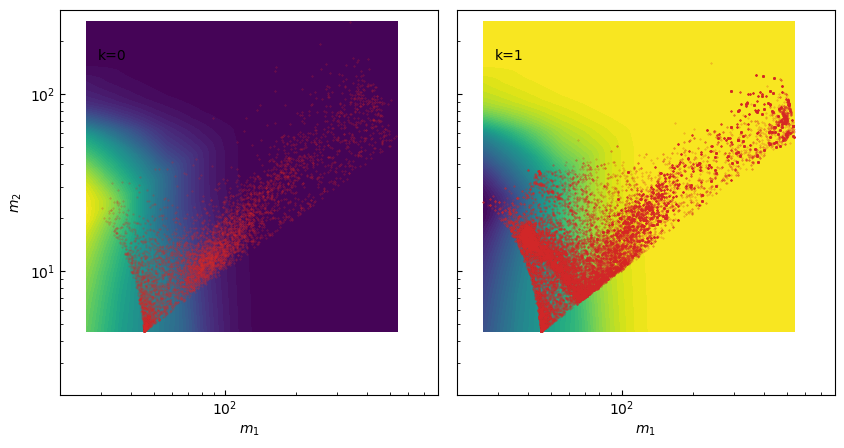

In [ ]:
# Example usage
# features = mockdata[:, :6]  # First 6 columns as features

plot_probability_distribution(model, features, device='cuda')



